In [1]:
import pandas as pd
import os

In [2]:
dataset_path = "./data/train-clean-100"
booktsv_list = []
# Walk through the directory tree
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".book.tsv"):
            file_path = os.path.join(root, file)
            booktsv_list.append(file_path)


In [3]:
column_names = ["audio_id", "Original_text", "Normalized_text", "Aligned", 	"Start_time",  "End_time", "STN"]

dfs = []
dfs_missnormal = []
error_file = []
for file in booktsv_list:
    try:
        first_line = pd.read_csv(file, sep='\t', nrows=1, quoting=3, header=None)
        num_columns = len(first_line.columns)
        if num_columns == len(column_names):
            df = pd.read_csv(file,sep = '\t', names=column_names, quoting=3, header=None)
            dfs.append(df)
        else:
            dfs_missnormal.append(file)
    except pd.errors.ParserError as e:
        error_file.append(file)
    

df = pd.concat(dfs, ignore_index=True)
df['duration'] = df['End_time'] - df['Start_time']
del dfs


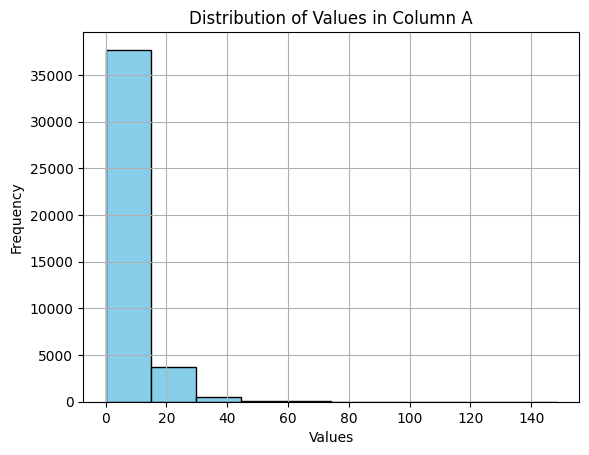

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['duration'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Column A')
plt.grid(True)
plt.show()


In [5]:
df['duration'].describe()

count    42113.000000
mean         7.351369
std          7.091970
min          0.000000
25%          2.860000
50%          5.420000
75%          9.430000
max        148.340000
Name: duration, dtype: float64